## 1.1 - Movielens full - EDA

---



 a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.
---

Jag startar med att titta över datan så att jag kan visualisera det bättre med planen att skriva ut filmer ihopsatta med deras respektive genre.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

movies_path = "../../data/ml-latest/movies.csv" # testar lite utöver med en path istället för att lägga en df direkt.

movies_df = pd.read_csv(movies_path)

print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Med denna utskrift så kan jag se att den innehåller tre stycken olika kolumner "movieId", "title" och "genres", vi kan dock se att genre delas med ett | planen är då att ta ut den relevanta med att splitta från varje | som förekommer för att få fram god data. ChatGPT gav mig ett tips om att använda Counter för att räkna relevant data, hittade tyvärr inte dom relevanta kommandona för det så jag skriver det med hjälp av just GPT men i lärningssyfte att jag ska veta vad jag gör. 

In [51]:
from collections import Counter # ChatGPT gav mig ett gott tips att använda Counter här

movies_path = "../../data/ml-latest/movies.csv"
movies_df = pd.read_csv(movies_path)

#Splitta genrerna från | och skapa en lista med alla genre
genre_list = "|".join(movies_df["genres"]).split("|") 

# Räkna varje del av genrerna
genre_counts = Counter(genre_list)

# Konverterar genre_counts till df för snygg visualisering
genre_counts_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Movies"])

# Sortera df efter antalet filmerna i descending order
genre_counts_df = genre_counts_df.sort_values(by="Movies", ascending = False).reset_index(drop=True) 

genre_counts_df

,Genre,Movies
0,Drama,33681
1,Comedy,22830
2,Thriller,11675
3,Romance,10172
4,Action,9563
5,Documentary,9283
6,Horror,8570
7,(no genres listed),7060
8,Crime,6917
9,Adventure,5349


med detta så kan vi med lätthet göra en plot på detta, använder matplotlib för denna övning.

Jag inser att den inte går efter datavisualiserings designregler, men i detta fall är det mera för att se till att allting skrivs ut rätt och stämmer.

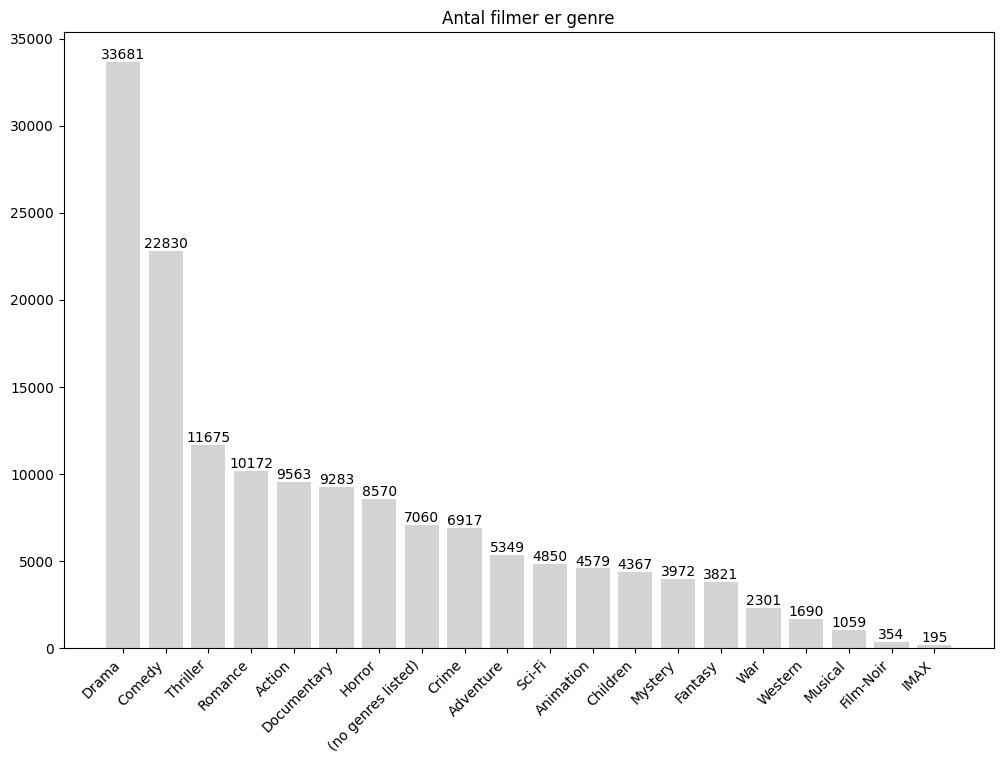

In [68]:
plt.figure(figsize=(12, 8))

plt.bar(genre_counts_df["Genre"], genre_counts_df["Movies"], color="lightgrey")

plt.title("Antal filmer er genre")

plt.xticks(rotation=45, ha="right")


#gör en uskrift av varje stapel för att dubbelkolla att siffrorna stämmer
for index, value in enumerate(genre_counts_df["Movies"]):
    plt.text(index, value, str(value), ha="center", va="bottom")

plt.show()


---

## b) Vilka är de 10 filmerna med flest ratings?

Jag startar med en ratings_df för lättare visualisering över datan jag har att jobba med.


In [53]:
import pandas as pd

ratings_path = "../../data/ml-latest/ratings.csv"

ratings_df = pd.read_csv(ratings_path)

ratings_df


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [64]:
# Gruppera ratings_df efter "movieId", räkna antalet ratings, och sortera i descending order.
c_rating = ratings_df.groupby("movieId").size().reset_index(name="count")
h_rating = c_rating.sort_values("count", ascending=False).head(10)

# Slå samman h_rating med movies_df för att få filmtitlar och genrer
h_rating_with_titles = pd.merge(h_rating, movies_df, on="movieId")

# Visa resultatet
display(h_rating_with_titles[["movieId", "title", "count"]])


,movieId,title,count
0,318,"Shawshank Redemption, The (1994)",122296
1,356,Forrest Gump (1994),113581
2,296,Pulp Fiction (1994),108756
3,2571,"Matrix, The (1999)",107056
4,593,"Silence of the Lambs, The (1991)",101802
5,260,Star Wars: Episode IV - A New Hope (1977),97202
6,2959,Fight Club (1999),86207
7,527,Schindler's List (1993),84232
8,480,Jurassic Park (1993),83026
9,1196,Star Wars: Episode V - The Empire Strikes Back...,80200


---

## c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.



In [63]:
import pandas as pd

# Gruppera ratings_df efter "movieId", räkna antalet ratings och sortera descending.
ratings_count = ratings_df.groupby("movieId").size().reset_index(name="count")
top_movies = ratings_count.sort_values("count", ascending=False).head(10)

# Slå samman top_movies med movies_df för att få filmtitlar
top_movies_w_df = pd.merge(top_movies, movies_df, on="movieId")

# Filtrera ratings_df för att få ut topp 10 filmerna och beräkna genomsnittliga ratingen.
top_movies_ratings = ratings_df[ratings_df["movieId"].isin(top_movies["movieId"])]
average_ratings = top_movies_ratings.groupby("movieId")["rating"].mean().reset_index()

# Slå ihop genomsnittliga ratings  med top_movies_w_df för att visa titlar och genomsnittliga ratingar
av_ratings = pd.merge(top_movies_w_df, average_ratings, on="movieId")

# SettingCopyWarning fix
final_results = av_ratings[["title", "count", "rating"]].copy()

# Byt namn på "rating" kolumnen till "average_rating" och avrunda till två decimaler
final_results.rename(columns={"rating": "average_rating"}, inplace=True)
final_results["average_rating"] = final_results["average_rating"].round(2)

display(final_results[["title", "average_rating"]])

,title,average_rating
0,"Shawshank Redemption, The (1994)",4.42
1,Forrest Gump (1994),4.07
2,Pulp Fiction (1994),4.19
3,"Matrix, The (1999)",4.16
4,"Silence of the Lambs, The (1991)",4.15
5,Star Wars: Episode IV - A New Hope (1977),4.09
6,Fight Club (1999),4.24
7,Schindler's List (1993),4.24
8,Jurassic Park (1993),3.69
9,Star Wars: Episode V - The Empire Strikes Back...,4.12


---
 ## d) Gör en plot över årtal och antalet filmer representerade i datasetet.

Jag hittade först inte ett effektivt sätt att få ur datan för just årtal ur vår csv så frågade GPT efter hjälp och fick en mycket intressant lösning som jag kommer att notera kortsammafattat vad rad 6 gör här.

**"Genom att använda denna metod kan man effektivt extrahera årtal från filmernas titlar, förutsatt att de följer det konsekventa mönstret av att ha årtal inneslutna i parenteser mot slutet av titeln."** - ChatGPT

"r" med dom olika tecknerna står för att få in datan rått alltså att strängarna behandlas på ett sätt som python kan läsa av för att sedan ta in dom fyra siffrorna "d{4}" i vårt fall år, önskar jag hade sett detta i tidigare uppgifter för att jag anser att det var en väldigt effektiv och stark "bruteforce" lösning på det jag behövde, lagt en mental notering på detta och ska se hur jag kan använda det i kommande uppgifter.

Annars flöt denna uppgift på lätt, märkbart att man börjar bli varm i kläderna för just att lägga data inom grafer och vad vi kan notera är explosionen av filmer som började släppas vid VHS uppfinning för att sedan gå nedåt under Covid.

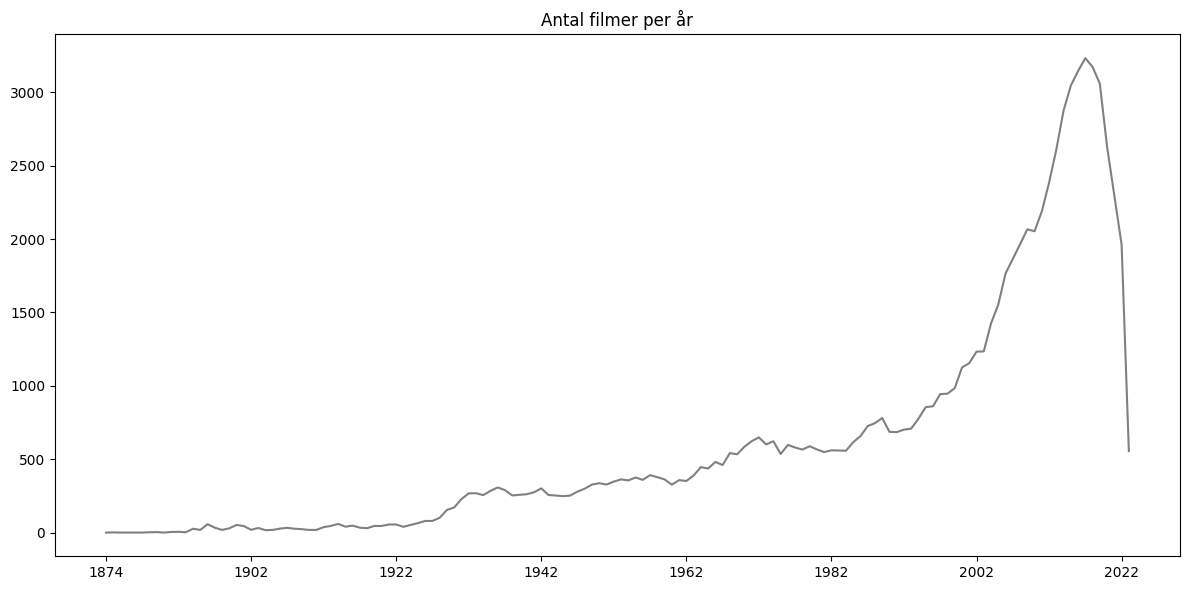

In [56]:

movies_df["year"] = movies_df["title"].str.extract(r"\((\d{4})\)") #GPT hjälp att få ut årtal 

movies_per_year = movies_df.groupby("year").size()

plt.figure(figsize=(12, 6)) # Figsize för bättre visualisering
movies_per_year.plot(kind="line", color="grey", linewidth=1.5)
plt.title("Antal filmer per år")
plt.xlabel("") # x-label som tom annars får jag ut groupby namnet
plt.tight_layout()
plt.show()


---

 e) Gör en plot över antalet ratings mot movieId

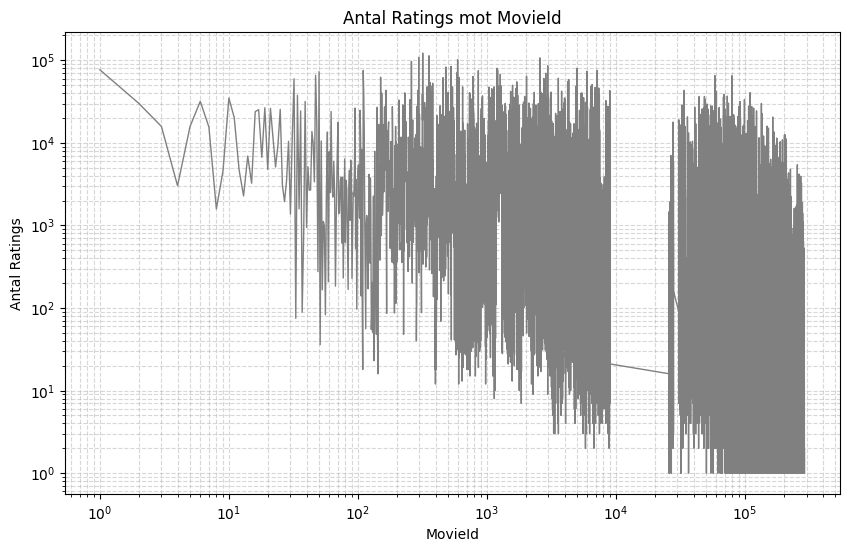

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladda in ratings.csv
ratings_df = pd.read_csv("../../data/ml-latest/ratings.csv")

# Gruppera efter 'movieId' och räkna antalet ratings för varje film
ratings_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# Sortera 'ratings_count' efter 'movieId' för att säkerställa korrekt ordning för plottningen
ratings_count_sorted = ratings_count.sort_values('movieId')

# Skapa en linjegraf för 'movieId' mot antalet ratings
plt.figure(figsize=(10, 6))
plt.plot(ratings_count_sorted['movieId'], ratings_count_sorted['count'], color='grey', linewidth=1)
plt.title('Antal Ratings mot MovieId')
plt.xlabel('MovieId')
plt.ylabel('Antal Ratings')
plt.xscale('log')  # Logaritmisk skala för x-axeln
plt.yscale('log')  # Logaritmisk skala för y-axeln för att hantera variation i antal ratings
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
